# Model C + Epoch 100 + Batch 4

 Train : 894 Images

 Valid : 75 Images

In [2]:
!nvidia-smi

Mon Mar 24 21:41:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8              8W /  320W |     603MiB /  16376MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch

print("number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4080 SUPER


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


In [5]:
import os
HOME = os.getcwd()
print(HOME)

c:\5025211148\YOLOv9-Segmentation


In [6]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Setup complete  (32 CPUs, 63.8 GB RAM, 244.2/476.5 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%pip install --user roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R66BD6MEFMOCLYffXdn9")
project = rf.workspace("mcab").project("merge-inez")
version = project.version(1)
dataset = version.download("yolov9")
                

In [8]:
%cd {HOME}


c:\5025211148\YOLOv9-Segmentation


In [9]:
model = YOLO("yolov9c-seg.pt")

In [10]:
model.info()

YOLOv9c-seg summary: 654 layers, 27,897,120 parameters, 0 gradients, 159.4 GFLOPs


(654, 27897120, 0, 159.41411839999998)

In [11]:
result = model.train(data="C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\data.yaml", epochs=100, imgsz=640, batch=4)

New https://pypi.org/project/ultralytics/8.3.95 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine\trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=C:\5025211148\YOLOv9-Segmentation\merge-inez-1\data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\train\labels.cache... 894 images, 0 backgrounds, 0 corrupt: 100%|██████████| 894/894 [00:00<?, ?it/s]
val: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

val: WARNING  C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_234_jpg.rf.8c97c306d89d4aea1956db536d9ae8da.jpg: 1 duplicate labels removed


Plotting labels to runs\segment\train20\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train20
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.73G      1.237      2.083      1.403       1.43          4        640: 100%|██████████| 224/224 [00:24<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 12.16it/s]

                   all         75        150        0.9      0.425      0.486       0.35        0.9      0.425      0.478      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.74G      1.247      1.948      1.053      1.421          4        640: 100%|██████████| 224/224 [00:22<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.61it/s]

                   all         75        150      0.681      0.627      0.684      0.406      0.703      0.613      0.694      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.7G      1.205      1.822     0.9941      1.386          9        640: 100%|██████████| 224/224 [00:22<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.39it/s]

                   all         75        150      0.996        0.5      0.611      0.452      0.996        0.5      0.592      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.76G      1.156      1.836     0.8691      1.365          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.95it/s]

                   all         75        150      0.575      0.543      0.528       0.41      0.575      0.543      0.527      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.65G      1.095      1.739     0.8036      1.313          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.70it/s]

                   all         75        150       0.64      0.685      0.699      0.509      0.634       0.68      0.711      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.76G      1.103      1.685     0.7498      1.312          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.66it/s]

                   all         75        150      0.619       0.58      0.578      0.448      0.594       0.62      0.614       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.73G      1.053      1.651     0.7162      1.288          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.07it/s]

                   all         75        150      0.757      0.753      0.677       0.51      0.717       0.72       0.65      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.71G      1.039       1.62     0.6825      1.275          7        640: 100%|██████████| 224/224 [00:20<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.29it/s]

                   all         75        150      0.645      0.523      0.539      0.443      0.691      0.535      0.554      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.7G          1       1.59     0.6704      1.251          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.33it/s]

                   all         75        150      0.706      0.622      0.614      0.506      0.694      0.616      0.628      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.72G     0.9797      1.551     0.6242      1.243         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.60it/s]

                   all         75        150      0.722      0.733      0.671      0.484      0.725       0.74      0.684      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.72G      0.972      1.535     0.6174      1.228         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.09it/s]

                   all         75        150      0.765      0.787      0.705      0.511      0.786       0.76      0.703        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.72G     0.9804      1.523     0.5954       1.24         13        640: 100%|██████████| 224/224 [00:22<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]

                   all         75        150      0.805      0.773      0.719      0.533      0.809        0.8      0.737      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.76G      0.948      1.486     0.5817      1.225         14        640: 100%|██████████| 224/224 [00:21<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.39it/s]

                   all         75        150      0.803      0.821      0.735      0.526      0.814      0.824      0.737      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.74G     0.9607       1.53     0.5725       1.23          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.37it/s]

                   all         75        150      0.672       0.68       0.63      0.497       0.68      0.687      0.633      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.66G     0.9466      1.463     0.5658      1.221         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.02it/s]

                   all         75        150      0.776      0.747      0.698      0.544      0.799      0.767      0.729      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.75G     0.9336      1.499     0.5555      1.219          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.91it/s]

                   all         75        150      0.707      0.693      0.637      0.515      0.767      0.747      0.693      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.71G     0.9136      1.454     0.5463      1.201         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.26it/s]

                   all         75        150      0.751      0.712      0.677      0.522      0.721      0.782      0.696       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.75G     0.9042      1.423     0.5259      1.192         12        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.34it/s]

                   all         75        150      0.796      0.787      0.721      0.547      0.825       0.82       0.75      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.73G     0.8956      1.422     0.5075      1.183         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.06it/s]

                   all         75        150      0.837      0.753      0.755      0.539       0.88      0.787      0.821      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.67G     0.9065      1.439     0.5133      1.184          3        640: 100%|██████████| 224/224 [00:21<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.39it/s]

                   all         75        150      0.633      0.324      0.394      0.263      0.676       0.33      0.421      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.67G     0.9081      1.438     0.5115       1.19          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.75it/s]

                   all         75        150      0.768      0.773      0.712      0.561      0.775       0.78      0.725      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.74G     0.8984      1.428     0.5117      1.191          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.67it/s]

                   all         75        150        0.8      0.767      0.723       0.53      0.798      0.793       0.72      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.7G     0.8939      1.423     0.5112      1.187         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.00it/s]

                   all         75        150      0.772       0.78      0.738      0.545      0.823      0.779      0.767      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.73G     0.8915      1.424      0.498       1.19          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.23it/s]

                   all         75        150      0.786      0.753      0.704       0.53      0.818       0.78      0.747      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.76G     0.9055      1.412     0.5058      1.187          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.67it/s]

                   all         75        150      0.812      0.825      0.764      0.551      0.844      0.857      0.824      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.69G     0.8788      1.379     0.4952      1.174          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.31it/s]

                   all         75        150      0.793       0.74      0.737      0.537      0.754       0.79      0.778      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.63G     0.8854      1.427     0.4948      1.187          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.77it/s]

                   all         75        150      0.752      0.687       0.71      0.461      0.801      0.725      0.746      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.73G     0.8741      1.382     0.4826      1.175          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.86it/s]

                   all         75        150      0.815      0.767      0.776      0.556       0.86      0.767      0.784      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.67G     0.8689      1.368     0.4771      1.162         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.35it/s]

                   all         75        150      0.764       0.72      0.707       0.56      0.781      0.733      0.718      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.72G     0.8638      1.372     0.4798      1.163          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.39it/s]

                   all         75        150      0.813      0.824      0.774      0.567      0.858       0.87      0.833      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.75G      0.858      1.368     0.4723      1.163          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.89it/s]

                   all         75        150      0.735      0.747      0.679      0.547      0.759      0.761       0.69      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.73G     0.8439      1.347     0.4591      1.157          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]

                   all         75        150      0.866      0.807      0.823      0.579      0.912      0.847      0.866      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.72G     0.8523      1.357     0.4612      1.155          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.87it/s]

                   all         75        150       0.85      0.847      0.821      0.586      0.878      0.846      0.831      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.75G     0.8536      1.333     0.4492      1.159          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.32it/s]

                   all         75        150      0.771      0.773      0.762      0.567      0.848       0.76      0.782      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.64G     0.8415      1.331     0.4559      1.146          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.37it/s]

                   all         75        150      0.773      0.753       0.73      0.556      0.788      0.767      0.755      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.72G     0.8274      1.314     0.4475      1.137          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.41it/s]

                   all         75        150      0.771      0.793      0.711       0.55      0.765      0.793      0.702      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.67G     0.8226      1.311     0.4355      1.139         12        640: 100%|██████████| 224/224 [00:21<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.67it/s]

                   all         75        150      0.768      0.773      0.733      0.566      0.816      0.823       0.77      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.72G     0.8306      1.302     0.4413      1.143          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]

                   all         75        150      0.814       0.84      0.798      0.587      0.821      0.847      0.806      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.75G     0.8406      1.319     0.4429      1.143          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.13it/s]

                   all         75        150      0.872      0.867      0.855      0.588      0.902      0.867      0.884      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.7G     0.8124      1.283     0.4353      1.138          8        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.19it/s]

                   all         75        150      0.812       0.86      0.817      0.579      0.849        0.9      0.886      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.7G      0.804      1.283     0.4288      1.121          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.87it/s]

                   all         75        150      0.812       0.82      0.779      0.578      0.833      0.833      0.792      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.71G     0.8179      1.286     0.4353       1.12          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.91it/s]

                   all         75        150      0.795      0.802      0.746      0.583      0.826      0.827      0.797      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.71G     0.8043      1.278     0.4226      1.118         12        640: 100%|██████████| 224/224 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.00it/s]

                   all         75        150       0.84      0.798      0.806      0.562      0.849      0.813      0.826      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.73G     0.8233        1.3     0.4233      1.137          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.09it/s]

                   all         75        150      0.827      0.833      0.835       0.57       0.87      0.827      0.865      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.7G     0.8287      1.297     0.4217      1.136         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.14it/s]

                   all         75        150      0.757      0.773      0.721      0.578      0.792      0.794      0.755      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.72G      0.814      1.279     0.4136      1.131         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.32it/s]

                   all         75        150      0.809      0.819      0.801      0.593      0.832      0.831      0.817      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.71G     0.7925      1.248     0.4133       1.12          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]

                   all         75        150       0.85        0.8      0.791      0.584      0.857       0.85      0.825      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.73G     0.7925      1.257     0.4231      1.114          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.58it/s]

                   all         75        150      0.698      0.693      0.643       0.54      0.695      0.687      0.627      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.7G      0.773      1.249     0.4059      1.107          7        640: 100%|██████████| 224/224 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.37it/s]

                   all         75        150      0.811       0.81       0.77      0.567      0.833       0.83      0.805       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.63G     0.7785      1.235     0.4008      1.109          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]

                   all         75        150      0.765      0.733      0.692      0.543      0.828       0.78      0.759      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.65G     0.7811      1.249     0.4108       1.11          5        640: 100%|██████████| 224/224 [00:22<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.95it/s]

                   all         75        150      0.811      0.813      0.781      0.566      0.833      0.827      0.777      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.76G     0.7861      1.256     0.4121      1.112          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.33it/s]

                   all         75        150      0.738      0.807      0.729      0.562      0.839      0.852      0.814      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.7G     0.7799      1.226     0.4007      1.101          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.36it/s]

                   all         75        150      0.804      0.772      0.766      0.587      0.873      0.832      0.859      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.73G      0.767       1.23      0.397      1.095         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.61it/s]

                   all         75        150      0.833      0.785      0.802        0.6      0.863       0.86      0.863      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.75G     0.7644      1.206       0.39      1.095         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.01it/s]

                   all         75        150      0.771      0.771      0.728      0.565      0.785      0.784      0.746      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.74G      0.763      1.215     0.3993      1.105         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.62it/s]

                   all         75        150      0.839      0.833      0.805      0.595      0.873      0.867      0.824       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.71G     0.7544      1.203     0.3889      1.097         12        640: 100%|██████████| 224/224 [00:21<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.39it/s]

                   all         75        150      0.783      0.747      0.717      0.563      0.826      0.787      0.748      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.74G     0.7665      1.226     0.3994      1.101         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.22it/s]

                   all         75        150      0.733      0.763      0.733      0.556      0.828      0.747      0.785      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.71G     0.7486      1.186     0.3854      1.095          5        640: 100%|██████████| 224/224 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.68it/s]

                   all         75        150      0.806      0.747      0.763      0.574      0.813      0.787      0.799      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.75G     0.7474      1.212     0.3815      1.084          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.27it/s]

                   all         75        150      0.765      0.707      0.693      0.554      0.819      0.759      0.748       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.75G     0.7548      1.185      0.385      1.092          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]

                   all         75        150      0.797       0.84      0.814      0.584      0.835       0.78      0.799      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.68G     0.7571      1.188     0.3844      1.092          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.76it/s]

                   all         75        150      0.876      0.864      0.855      0.584      0.917      0.896      0.895      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.74G     0.7353      1.163     0.3687      1.077          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]

                   all         75        150       0.85      0.867      0.845      0.602      0.925      0.867      0.886      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.71G     0.7322      1.178     0.3665      1.083          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.65it/s]

                   all         75        150      0.782      0.767      0.739      0.569      0.858      0.813      0.802      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.73G     0.7323      1.184     0.3687      1.079          3        640: 100%|██████████| 224/224 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.17it/s]

                   all         75        150       0.78      0.707      0.727      0.553      0.802       0.72       0.75      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.71G     0.7399      1.177     0.3719      1.077          5        640: 100%|██████████| 224/224 [00:22<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.04it/s]

                   all         75        150      0.887      0.784      0.816      0.583      0.873      0.827      0.847      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.72G     0.7139      1.155     0.3617      1.072          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.63it/s]

                   all         75        150        0.8      0.802      0.744      0.582      0.858      0.832      0.802      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.71G     0.7272      1.164     0.3619      1.079          9        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.27it/s]

                   all         75        150      0.837      0.827      0.809      0.597        0.9       0.84      0.849      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.75G     0.7179      1.154     0.3593      1.069          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.91it/s]

                   all         75        150      0.803      0.827      0.783      0.592      0.851      0.847      0.809      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.73G     0.7017      1.137      0.354      1.057          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.10it/s]

                   all         75        150      0.843      0.813      0.787      0.591      0.877      0.827      0.816      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.76G     0.7162      1.124     0.3566      1.075          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.29it/s]

                   all         75        150      0.868      0.853      0.862      0.604        0.9       0.84       0.86      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.75G     0.7052      1.125     0.3538      1.059          2        640: 100%|██████████| 224/224 [00:21<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.98it/s]

                   all         75        150      0.822      0.813      0.787      0.589      0.861      0.827      0.817      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.74G     0.7071      1.125     0.3558      1.059         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.16it/s]

                   all         75        150      0.836      0.826      0.839      0.604      0.885      0.826      0.861      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.76G     0.7003      1.125      0.349      1.059          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.48it/s]

                   all         75        150       0.83      0.835      0.815       0.59      0.892       0.85      0.861      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.73G     0.6986      1.111     0.3477      1.051         10        640: 100%|██████████| 224/224 [00:21<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.66it/s]

                   all         75        150      0.766      0.784       0.74      0.575      0.785      0.804      0.777      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.7G     0.6975      1.142     0.3488      1.052         11        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.99it/s]

                   all         75        150      0.823      0.859      0.816      0.592      0.822      0.847      0.826      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.72G     0.6739      1.077     0.3383      1.045          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.04it/s]

                   all         75        150      0.803       0.84      0.778      0.584      0.837      0.873      0.846      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.74G     0.6846      1.108     0.3389      1.049         12        640: 100%|██████████| 224/224 [00:21<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.23it/s]

                   all         75        150      0.831      0.847      0.804      0.584      0.897       0.85      0.867       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.63G     0.6859      1.124     0.3419       1.06          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.91it/s]

                   all         75        150      0.811       0.78      0.751      0.565      0.841      0.807      0.791      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.67G     0.6864      1.089     0.3382      1.047          6        640: 100%|██████████| 224/224 [00:22<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.10it/s]

                   all         75        150      0.824       0.82      0.805      0.594      0.873      0.807       0.84       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.76G     0.6769      1.092     0.3388      1.049          8        640: 100%|██████████| 224/224 [00:22<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.70it/s]

                   all         75        150      0.843      0.801      0.805      0.595      0.858      0.814      0.817      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.78G     0.6551       1.05     0.3249      1.031          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.63it/s]

                   all         75        150       0.84      0.827       0.82      0.606      0.931       0.84      0.886      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.74G     0.6674      1.073     0.3279       1.04         12        640: 100%|██████████| 224/224 [00:21<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.13it/s]

                   all         75        150      0.869      0.832      0.839      0.603      0.877       0.88       0.88      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.74G     0.6572      1.067     0.3283       1.04          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.60it/s]

                   all         75        150      0.801      0.847      0.803      0.593      0.881      0.833      0.839      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.73G     0.6642      1.092     0.3358      1.037          6        640: 100%|██████████| 224/224 [00:21<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.66it/s]

                   all         75        150      0.837      0.833      0.814      0.599      0.878       0.84      0.851      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.74G     0.6505       1.06      0.325      1.028          3        640: 100%|██████████| 224/224 [00:21<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.67it/s]

                   all         75        150      0.849      0.891      0.859      0.612      0.849      0.891      0.865      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.7G     0.6561      1.052     0.3262      1.032          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.29it/s]

                   all         75        150      0.863      0.827      0.832      0.599      0.861      0.847      0.843      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.73G     0.6399      1.054     0.3162       1.03          7        640: 100%|██████████| 224/224 [00:21<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.70it/s]

                   all         75        150      0.851      0.867      0.854        0.6      0.944      0.847      0.905      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.73G     0.6507       1.05     0.3214      1.035          5        640: 100%|██████████| 224/224 [00:21<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.20it/s]

                   all         75        150      0.845      0.807      0.792      0.585      0.874      0.827      0.822      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.72G     0.6444      1.063     0.3218      1.038          3        640: 100%|██████████| 224/224 [00:21<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.30it/s]

                   all         75        150      0.831       0.81      0.778      0.585       0.86      0.827      0.821      0.565


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.7G     0.6319      1.057     0.2974      1.033          4        640: 100%|██████████| 224/224 [00:22<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.62it/s]

                   all         75        150      0.866      0.853       0.84      0.599      0.896       0.87      0.856      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       3.7G     0.6233      1.043     0.2913      1.024          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.80it/s]

                   all         75        150      0.825      0.794      0.778      0.589       0.84      0.807      0.796      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       3.7G     0.6092      1.057     0.2875      1.022          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.43it/s]

                   all         75        150      0.851      0.847      0.828      0.602      0.921      0.836      0.865      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.69G     0.6107      1.025     0.2859      1.022          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.10it/s]

                   all         75        150      0.845      0.824      0.815      0.599      0.842      0.853      0.836      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.71G     0.5992      1.001     0.2823      1.009          4        640: 100%|██████████| 224/224 [00:22<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.76it/s]

                   all         75        150      0.855      0.861      0.848      0.598      0.864      0.867      0.858      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.63G     0.5868     0.9963     0.2775      1.005          4        640: 100%|██████████| 224/224 [00:22<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.30it/s]

                   all         75        150       0.82      0.827      0.797      0.588      0.852      0.853      0.832      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.7G     0.5839     0.9829     0.2754      1.002          4        640: 100%|██████████| 224/224 [00:22<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.62it/s]

                   all         75        150      0.805       0.84      0.782      0.592      0.861      0.821       0.81      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.7G     0.5816     0.9815     0.2762      1.003          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.82it/s]

                   all         75        150      0.845      0.856      0.818      0.602      0.887      0.847      0.842      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.7G     0.5758     0.9857     0.2732     0.9977          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 13.78it/s]

                   all         75        150      0.837      0.853      0.809      0.601       0.88      0.853      0.834      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.7G     0.5652     0.9706     0.2696     0.9883          4        640: 100%|██████████| 224/224 [00:21<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 14.23it/s]

                   all         75        150      0.841      0.847      0.816      0.602      0.889      0.866      0.853      0.581



100 epochs completed in 0.659 hours.
Optimizer stripped from runs\segment\train20\weights\last.pt, 56.2MB
Optimizer stripped from runs\segment\train20\weights\best.pt, 56.2MB

Validating runs\segment\train20\weights\best.pt...
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,626,070 parameters, 0 gradients, 157.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:00<00:00, 12.05it/s]


                   all         75        150       0.84      0.827       0.82      0.608      0.931       0.84      0.886      0.601
                    ab         75         75      0.992          1      0.995      0.967      0.995          1      0.995      0.934
                    mc         75         75      0.689      0.653      0.645      0.249      0.868       0.68      0.777      0.269
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\train20



image 1/1 C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg: 640x640 1 ab, 50.0ms
Speed: 1.0ms preprocess, 50.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


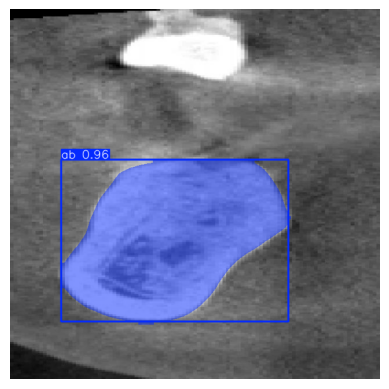

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from ultralytics import YOLO

model = YOLO("C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train20\\weights\\best.pt")  # load a custom model

# Predict with the model
results = model("C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg")


predicted_img = results[0].plot()
output_dir = "C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\predict"
os.makedirs(output_dir, exist_ok=True)

output_image_path = os.path.join(output_dir, "predicted.jpg")

cv2.imwrite(output_image_path, predicted_img)

predicted_img_rgb = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

plt.imshow(predicted_img_rgb)
plt.axis('off')  # Hilangkan sumbu
plt.show()

In [14]:
model_path = r'C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train20\\weights\\best.pt'
valid_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images'
ground_truth_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\labels'
gt_AB_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB"
gt_MC_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC"

segmented_AB_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_AB.npy'

segmented_MC_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_MC.npy'

for path in [gt_AB_path, gt_MC_path, segmented_AB_path, segmented_MC_path]:
  os.makedirs(path, exist_ok=True)

In [15]:
import os
import re

# specify the directory path
directory_path = valid_path

# create an empty list to store the filenames with directory path
file_list = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'slice_(\d+)', s)  # Match 'slice_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list = sorted(file_list, key=extract_number)
for filename in file_list:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'slice_0', 'slice_1', 'slice_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_1_png.rf.813ec633aebc1e939b902b040068a91a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_3_png.rf.2b7ac0dccdcc3241e2441dcdfe40b19a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_4_png.rf.ed9951865dd8c8e9c4bb357b12d90bf3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_5_png.rf.fa534a063f0865aba05bfb1f39bf17f1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_6_png.rf.69513226c67a48924c9727490a40871b.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_7_png.rf.911a9c8ba0e64b11ffd5e11ceb31250e.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images

In [16]:
from ultralytics import YOLO

# Load a model
model = YOLO(model_path, task='segment')  # load a pretrained model (recommended for training)

In [17]:
results = model(file_list, save=True)


0: 640x640 1 ab, 1 mc, 10.2ms
1: 640x640 1 ab, 10.2ms
2: 640x640 1 ab, 10.2ms
3: 640x640 1 ab, 10.2ms
4: 640x640 1 ab, 1 mc, 10.2ms
5: 640x640 1 ab, 1 mc, 10.2ms
6: 640x640 1 ab, 1 mc, 10.2ms
7: 640x640 1 ab, 1 mc, 10.2ms
8: 640x640 1 ab, 1 mc, 10.2ms
9: 640x640 1 ab, 1 mc, 10.2ms
10: 640x640 1 ab, 1 mc, 10.2ms
11: 640x640 1 ab, 1 mc, 10.2ms
12: 640x640 1 ab, 1 mc, 10.2ms
13: 640x640 1 ab, 1 mc, 10.2ms
14: 640x640 1 ab, 1 mc, 10.2ms
15: 640x640 1 ab, 1 mc, 10.2ms
16: 640x640 1 ab, 1 mc, 10.2ms
17: 640x640 1 ab, 10.2ms
18: 640x640 1 ab, 2 mcs, 10.2ms
19: 640x640 1 ab, 1 mc, 10.2ms
20: 640x640 1 ab, 1 mc, 10.2ms
21: 640x640 1 ab, 10.2ms
22: 640x640 1 ab, 1 mc, 10.2ms
23: 640x640 1 ab, 1 mc, 10.2ms
24: 640x640 1 ab, 10.2ms
25: 640x640 1 ab, 10.2ms
26: 640x640 1 ab, 10.2ms
27: 640x640 1 ab, 1 mc, 10.2ms
28: 640x640 1 ab, 1 mc, 10.2ms
29: 640x640 1 ab, 1 mc, 10.2ms
30: 640x640 1 ab, 1 mc, 10.2ms
31: 640x640 1 ab, 1 mc, 10.2ms
32: 640x640 1 ab, 1 mc, 10.2ms
33: 640x640 1 ab, 1 mc, 10.2ms
34

In [18]:
print(len(results))

75


In [19]:
import torch
import cv2
import numpy as np
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    boxes = result.boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    AB_indices = (AB_indices[0][0].unsqueeze(0),)
    # AB_indices = AB_indices[0][0]
    print('class', clss)
    print('indices', AB_indices)
    # Convert mask to single channel image
    try:
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
    except Exception as e:
      print('error',e)
      # print('\n')
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_0.jpg


class tensor([0.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_1.jpg


class tensor([0.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_2.jpg


class tensor([0.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_3.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_4.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_5.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Seg

In [20]:
import os
import re

# specify the directory path
directory_path = segmented_AB_path_2

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_AB = sorted(file_list_AB, key=extract_number)
for filename in file_list_AB:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [21]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_AB_npy, stacked_images)

(75, 200, 101)


In [22]:
import torch
import cv2
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    try:
      boxes = result.boxes.data
      clss = boxes[:, 5]
      AB_indices = torch.where(clss == 1)
      AB_indices = (AB_indices[0][0].unsqueeze(0),)
      # AB_indices = AB_indices[0][0]
      print('class', clss)
      print('indices', AB_indices)
      # Convert mask to single channel image
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      print('ketemu')
    except Exception as e:
      print('error',e)
      width = 101
      height = 200
      black_image = np.zeros((height, width), dtype=np.uint8)
      print('tidak ada mc lo..')
      # Save the black image to a file
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      i = i+1
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_0.jpg
ketemu


error index 0 is out of bounds for dimension 0 with size 0
tidak ada mc lo..
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_1.jpg
error index 0 is out of bounds for dimension 0 with size 0
tidak ada mc lo..
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_2.jpg
error index 0 is out of bounds for dimension 0 with size 0
tidak ada mc lo..
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_3.jpg
class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_4.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_5.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025

In [23]:
import os
import re

# specify the directory path
directory_path = segmented_MC_path_2

# create an empty list to store the filenames with directory path
file_list_MC = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_MC.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_MC = sorted(file_list_MC, key=extract_number)
for filename in file_list_MC:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [24]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_MC]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_MC_npy, stacked_images)

(75, 200, 101)


In [25]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_AB_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            class_1_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                    # Convert normalized coordinates to pixel coordinates
                    img_height, img_width, _ = img.shape
                    points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                    if class_label == 0:
                        class_0_points.extend(points)
                    elif class_label == 1:
                        class_1_points.extend(points)

            # Create numpy arrays of points for drawing the polygons
            polygon_points_0 = np.array(class_0_points)
            polygon_points_1 = np.array(class_1_points)

            # Draw the filled polygons on the mask
            if len(polygon_points_0) > 0:
                cv2.fillPoly(mask, [polygon_points_0], color=(0, 0, 0))
            if len(polygon_points_1) > 0:
                cv2.fillPoly(mask, [polygon_points_1], color=(255, 255, 255))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_AB = image_loader.load_images()


Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_13_png.rf.3

In [26]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_MC_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    if class_label == 1:
                        points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                        # Convert normalized coordinates to pixel coordinates
                        img_height, img_width, _ = img.shape
                        points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                        class_0_points.extend(points)

            # Create a numpy array of points for drawing the polygon
            polygon_points = np.array(class_0_points)

            # Draw the filled polygon on the mask
            if len(polygon_points) > 0:
                cv2.fillPoly(mask, [polygon_points], color=(0, 0, 0))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_MC = image_loader.load_images()

Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_13_png.rf.3

In [27]:
import os
import cv2
import numpy as np
import re

def read_images_as_binary_sorted(path, threshold=127):
    image_list = []

    # Get all files in the folder
    files = os.listdir(path)

    # Sort files based on filenames
    sorted_files = sorted(files, key=sort_key)

    # Iterate over sorted files
    for file_name in sorted_files:
        # Check if the file is an image (you can adjust the condition based on your image formats)
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            # Read the image in grayscale
            image_path = os.path.join(path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Apply thresholding to convert grayscale to binary image
                _, binary_image = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
                image_list.append(binary_image)
                # unique_values, counts = np.unique(binary_image, return_counts=True)
                # for value, count in zip(unique_values, counts):
                    # print(f"{value}: {count}")

    # Convert the list of images to a numpy array
    image_array = np.array(image_list)
    return image_array

def sort_key(file_name):
    parts = re.split(r'(\d+)', file_name)
    parts[1::2] = map(int, parts[1::2])  # Convert numeric parts to integers
    return parts

# Example usage:
# sorted_images = read_images_as_grayscale_sorted("/path/to/images")


In [28]:
# Example usage:
path_to_images = gt_AB_path
gt_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_AB.shape)

Shape of images array: (75, 200, 101)


In [29]:

# Example usage:
path_to_images = gt_MC_path
gt_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_MC.shape)

Shape of images array: (75, 200, 101)


In [30]:

# Example usage:
path_to_images = segmented_AB_path
segmented_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_AB.shape)

Shape of images array: (75, 200, 101)


In [31]:

# Example usage:
path_to_images = segmented_MC_path
segmented_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_MC.shape)

Shape of images array: (75, 200, 101)


In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix


def calculate_iou(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0

    # print(gt.shape)
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    # unique_values, counts = np.unique(gt, return_counts=True)
    # for value, count in zip(unique_values, counts):
    #    print(f"{value}: {count}")
    # print(cm)
    intersection = np.diag(cm) #TN dan TP
    union = np.sum(cm, axis=0) + np.sum(cm, axis=1) - intersection
    # print(np.sum(cm, axis=0))
    # print(np.sum(cm, axis=1))
    # print(intersection)
    # iou = np.mean((intersection + 1e-10) / (union + 1e-10))
    # only calculate the iou for AB or MC thats why we use index [1] in intersection
    iou = (intersection[1] + 1e-10) / (union[1] + 1e-10)
    return iou

def calculate_dice_score(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    intersection = np.diag(cm)
    union_dice = np.sum(cm, axis=0) + np.sum(cm, axis=1)
    # dice_score = np.mean(2 * (intersection + 1e-10) / (union_dice + 1e-10))
    dice_score = 2 * (intersection[1] + 1e-10) / (union_dice[1] + 1e-10)
    return dice_score

def calculate_average_iou_and_dice(gt_images, pred_images):
    num_images = gt_images.shape[0]
    iou_scores = []
    dice_scores = []

    for i in range(num_images):
        gt_image = gt_images[i]
        pred_image = pred_images[i]
        iou = calculate_iou(gt_image, pred_image)
        dice = calculate_dice_score(gt_image, pred_image)
        print(i,"iou:",iou)
        print(i,"dice:",dice)
        iou_scores.append(iou)
        dice_scores.append(dice)

    avg_iou = np.nanmean(iou_scores)  # Use np.nanmean to handle NaN values
    avg_dice = np.nanmean(dice_scores)  # Use np.nanmean to handle NaN values
    return avg_iou, avg_dice

# Example usage:
# gt_images and pred_images are numpy arrays containing grayscale images
# Each array should have shape (num_images, height, width)


In [33]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_AB, gt_AB)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
print()
# print("Average Dice Score:", avg_dice)

0 iou: 0.9408531797958665
0 dice: 0.9695253505933257
1 iou: 0.915489272632132
1 dice: 0.9558803442152854
2 iou: 0.9220948410630557
2 dice: 0.9594686186796942
3 iou: 0.9301173402868337
3 dice: 0.9637935693056071
4 iou: 0.9500657030223404
4 dice: 0.9743935309973184
5 iou: 0.9291581108829587
5 dice: 0.9632783395423236
6 iou: 0.960313315926894
6 dice: 0.9797549280767318
7 iou: 0.9592641261498039
7 dice: 0.9792085848424014
8 iou: 0.9584096259482093
8 dice: 0.9787631895285297
9 iou: 0.9476153244722453
9 dice: 0.9731031714171153
10 iou: 0.9477415966386569
10 dice: 0.9731697451800058
11 iou: 0.9381201044386439
11 dice: 0.9680722080021694
12 iou: 0.9275773195876308
12 dice: 0.9624281321032362
13 iou: 0.928018575851395
13 dice: 0.9626655961461399
14 iou: 0.9478527607361976
14 dice: 0.9732283464567064
15 iou: 0.9384498480243176
15 dice: 0.9682477459819814
16 iou: 0.9496712190187165
16 dice: 0.9741860163445457
17 iou: 0.8813886210221832
17 dice: 0.93695540748336
18 iou: 0.90629139072848
18 dice: 0

In [ ]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_MC, gt_MC)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
# print("Average Dice Score:", avg_dice)

0 iou: 0.6850393700789882
0 dice: 0.8130841121500874
1 iou: 6.410256410252302e-13
1 dice: 1.2820512820504603e-12
2 iou: 6.993006993002104e-13
2 dice: 1.3986013986004208e-12
3 iou: 7.352941176465183e-13
3 dice: 1.4705882352930366e-12
4 iou: 0.7518248175184294
4 dice: 0.8583333333338091
5 iou: 0.8223684210527485
5 dice: 0.9025270758126707
6 iou: 0.7674418604652966
6 dice: 0.8684210526320754
7 iou: 0.7920000000001663
7 dice: 0.8839285714290698
8 iou: 0.7803030303031968
8 dice: 0.8765957446813292
9 iou: 0.8000000000001539
9 dice: 0.8888888888893638
10 iou: 0.7236842105264977
10 dice: 0.8396946564889926
11 iou: 0.6503067484664723
11 dice: 0.7881040892197815
12 iou: 0.6858974358976373
12 dice: 0.8136882129282078
13 iou: 0.6395348837211399
13 dice: 0.7801418439720639
14 iou: 0.666666666666855
14 dice: 0.8000000000004068
15 iou: 0.7696969696971093
15 dice: 0.8698630136990172
16 iou: 0.733333333333495
16 dice: 0.8461538461542496
17 iou: 4.2918454935603903e-13
17 dice: 8.583690987120781e-13
18 i

: 